In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [6]:
os.getcwd()

'C:\\Users\\melis\\Desktop\\Bootcamp'

In [7]:
hm = pd.read_csv('hmelq.csv')

df = hm.copy()

# bad kolonu 0 ve 1lerden oluşuyor. loan aldığı borç. mortdue aldığı ev kredisi miktarı.    burda t test yapılcak 2 grup var iyi ve kötü
# kategoriklere crosstable yap. neden almış hangi meslek cross table. 
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [8]:
description = df.describe(include='all')
description

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3429,3409,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2371,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199385,18529.697987,74013.907992,101076.922759,NaN,NaN,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,NaN,NaN,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,NaN,NaN,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,NaN,NaN,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,NaN,NaN,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,NaN,NaN,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000


In [9]:
data_types = df.dtypes
data_types

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [10]:
df.isnull().sum().rename_axis('Variables').reset_index(name='MissVal')
#to get number of all missing values.

,Variables,MissVal
0,bad,0
1,loan,0
2,mortdue,314
3,value,64
4,reason,147
5,job,167
6,yoj,312
7,derog,427
8,delinq,351
9,clage,179


In [11]:
df.dropna(axis=0,how='any', inplace=True)
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


In [12]:
df.columns

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


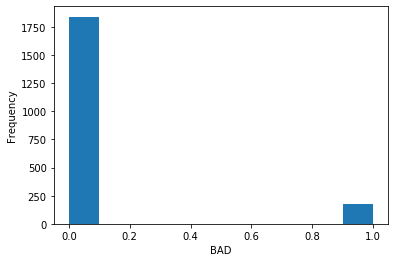

In [14]:
plt.hist(df.bad)
plt.xlabel('BAD')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'REASON')

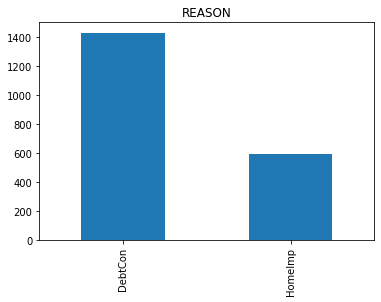

In [15]:
reason_count=df['reason']
df['reason'].value_counts().plot.bar()
plt.title('REASON')

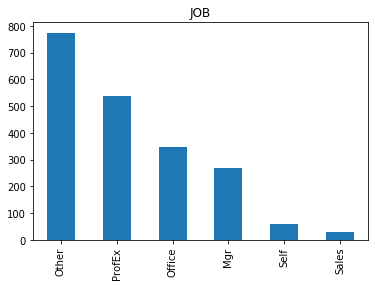

In [16]:
job_count=df['job'].value_counts()
df['job'].value_counts().plot.bar(title='JOB')

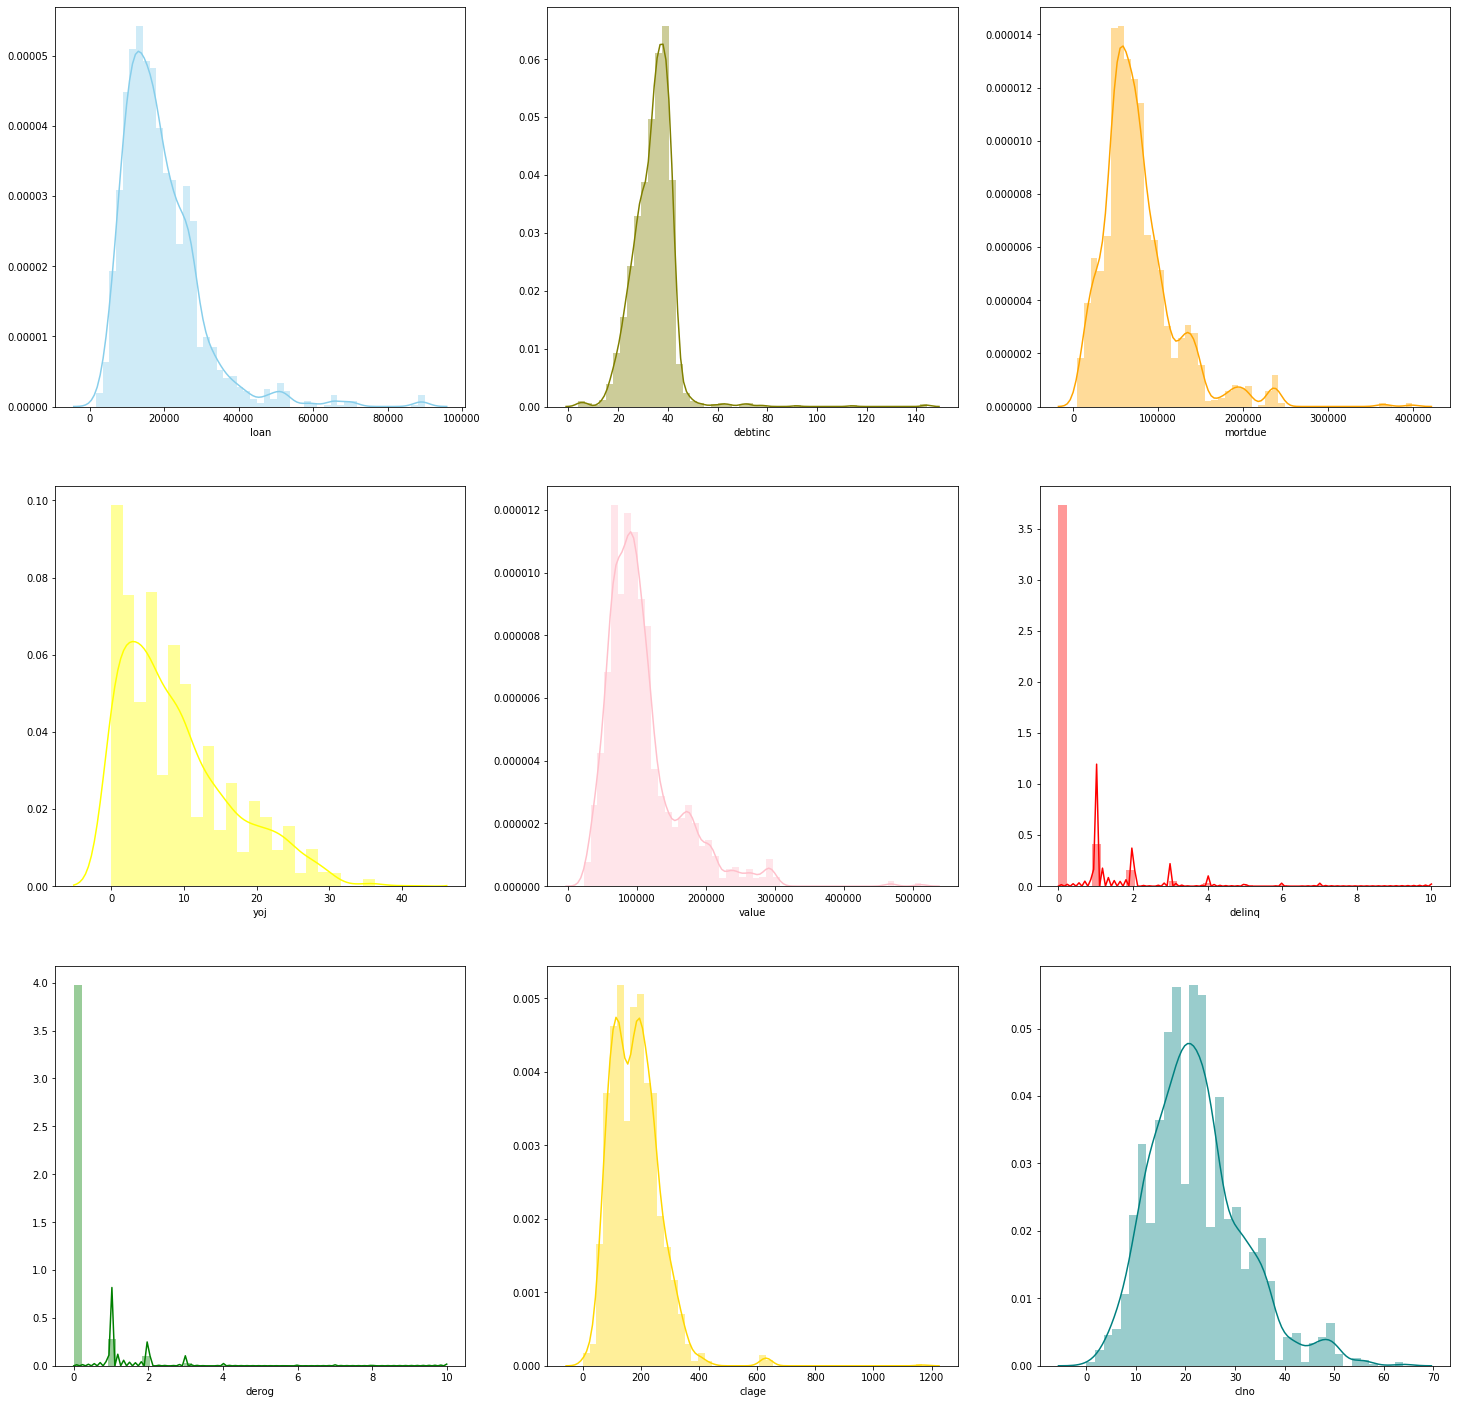

In [17]:
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["loan"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["debtinc"] , color="olive", ax=axes[0, 1])
sns.distplot( df["mortdue"] , color="orange", ax=axes[0, 2])
sns.distplot( df["yoj"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["value"] , color="pink", ax=axes[1, 1])
sns.distplot( df["delinq"] , color="red", ax=axes[1, 2])
sns.distplot( df["derog"] , color="green", ax=axes[2, 0])
sns.distplot( df["clage"] , color="gold", ax=axes[2, 1])
sns.distplot( df["clno"] , color="teal", ax=axes[2, 2])

Text(0, 0.5, 'BAD')

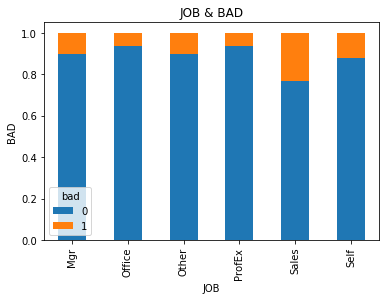

In [18]:
job = pd.crosstab(df['job'],df['bad'])
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',title='JOB & BAD',stacked=True)
plt.xlabel('JOB')
plt.ylabel('BAD')

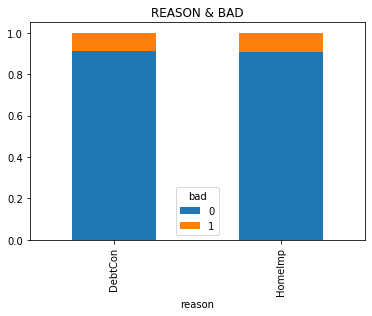

In [19]:
reason =pd.crosstab(df['reason'],df['bad'])
reason.div(reason.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title='REASON & BAD')

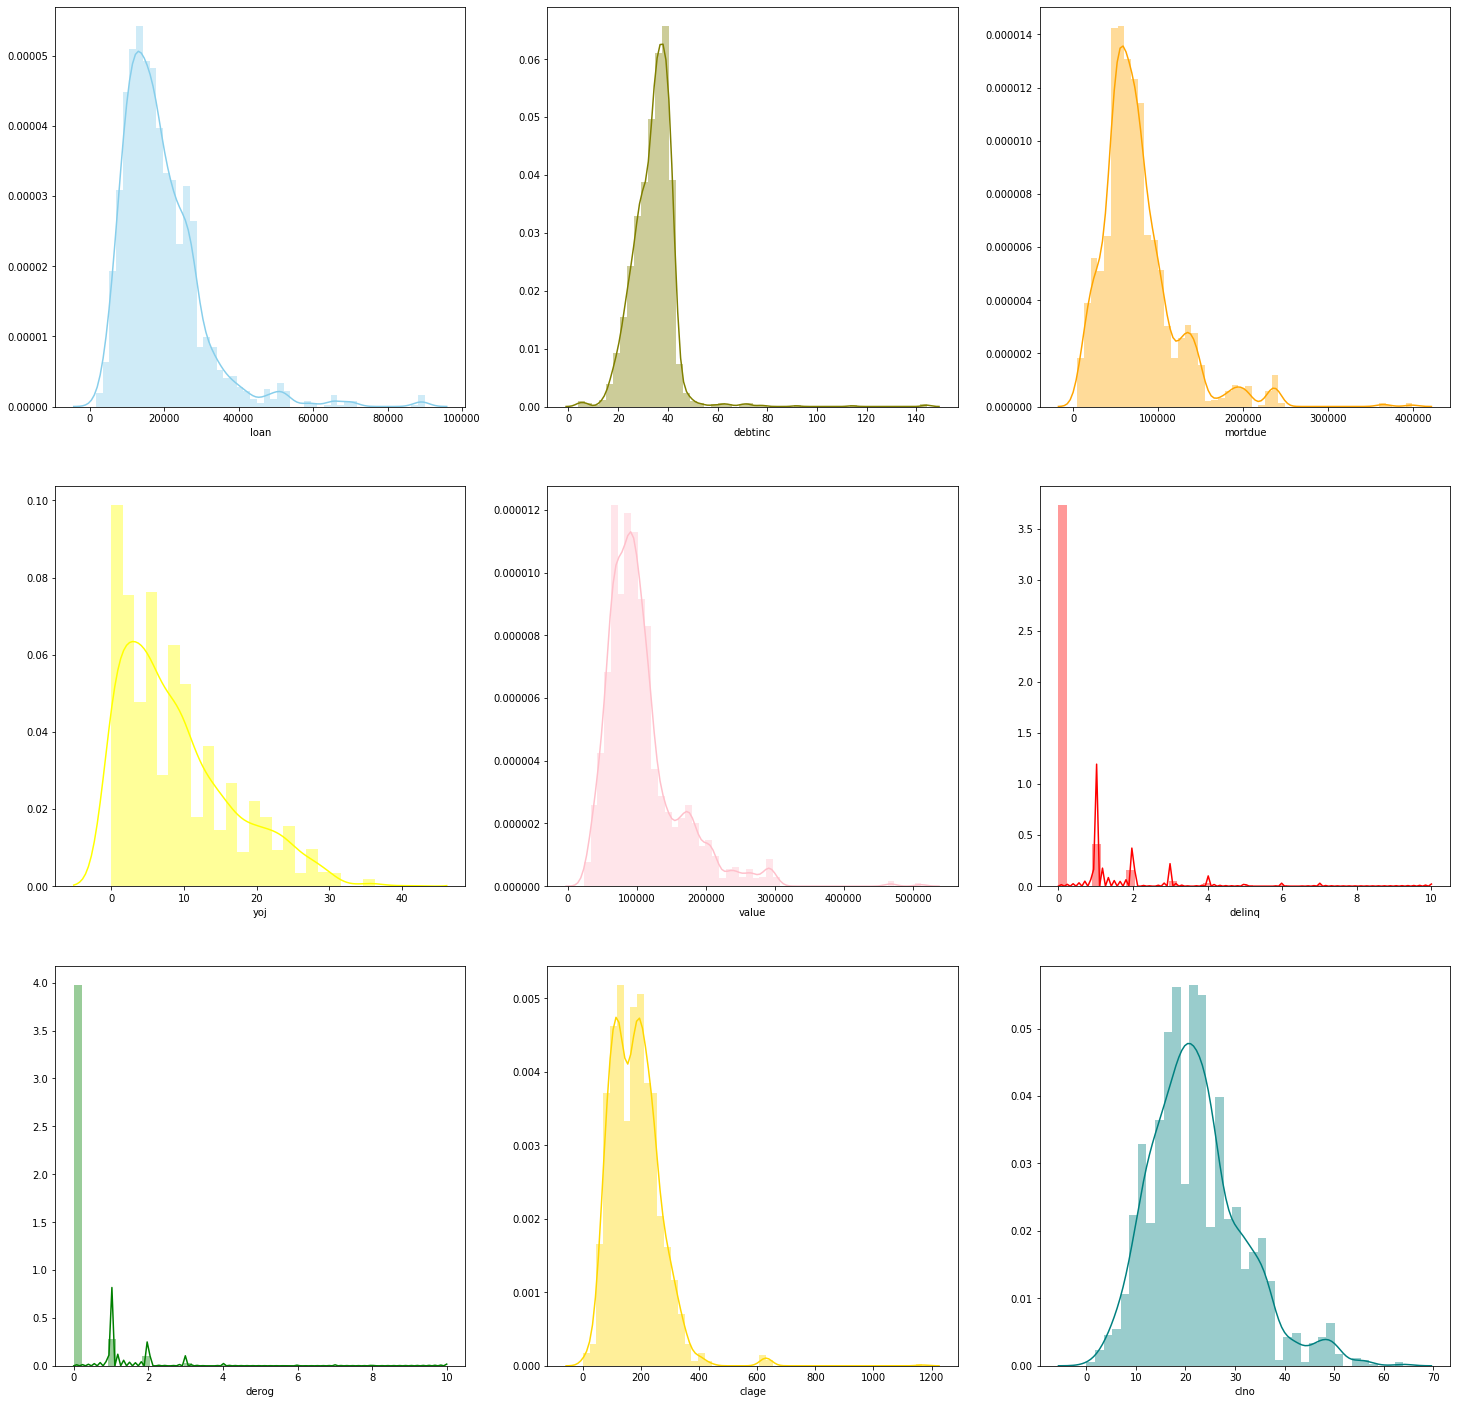

In [20]:
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["loan"], color="skyblue", ax=axes[0,0])
sns.distplot( df["debtinc"] , color="olive", ax=axes[0, 1])
sns.distplot( df["mortdue"] , color="orange", ax=axes[0, 2])
sns.distplot( df["yoj"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["value"] , color="pink", ax=axes[1, 1])
sns.distplot( df["delinq"] , color="red", ax=axes[1, 2])
sns.distplot( df["derog"] , color="green", ax=axes[2, 0])
sns.distplot( df["clage"] , color="gold", ax=axes[2, 1])
sns.distplot( df["clno"] , color="teal", ax=axes[2, 2])

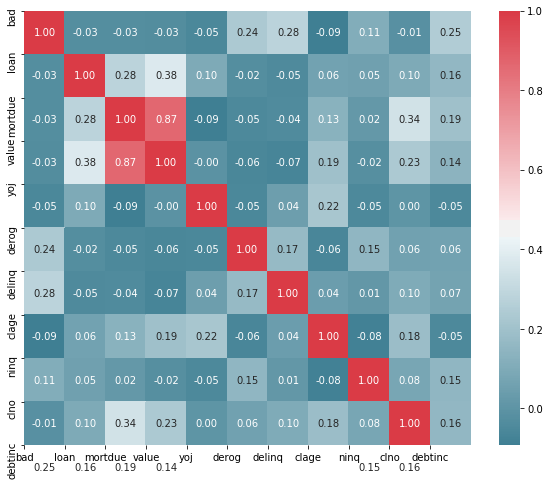

In [21]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(10,8))
colormap =sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt='.2f')
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

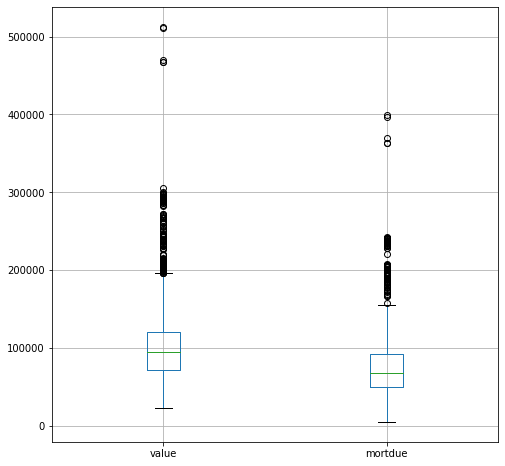

In [22]:
df[['value', 'mortdue']].boxplot(figsize = (8,8))

In [23]:
df.drop(columns=['reason', 'job'])
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [28]:
from scipy.stats import shapiro

In [31]:
st1, p1 = shapiro (df['value'])
print('stat:',st1,'p:',p1)
alpha=0.05
if p1 >alpha:
    print('Fail to reject: Data distributed normally')  
else:
    print('Reject: Data does not distribute normally')

stat: 0.8436811566352844 p: 1.0142738414629458e-40
Reject: Data does not distribute normally


In [32]:
st2, p2 = shapiro (df['mortdue'])
print('stat:',st2,'p:',p2)
alpha=0.05
if p2 >alpha:
    print('Fail to reject: Data distributed normally')  
else:
    print('Reject: Data does not distribute normally')

stat: 0.8624268174171448 p: 7.460412130575895e-39
Reject: Data does not distribute normally


In [36]:
from scipy import stats
from scipy.stats import levene
st3, p3 = stats.levene(df['value'], df['mortdue'])
alpha = 0.05
print('stat:',st3,'p:',p3)
if p3 > alpha:
    print("Fail to recejt: Constant variance")
else:
    print("Reject! Inconstant variance")

stat: 27.166309046206063 p: 1.960277648170479e-07
Reject! Inconstant variance
